In [1]:
# !pip install odfpy
# !pip install seaborn
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from yaml import Loader
import numpy as np
import analyze_cells_energy as ace
import utils
from scipy.stats import ttest_ind, mannwhitneyu
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'WILD_with_father'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
                if os.path.isdir(os.path.join(data_directory, name))]

In [3]:
# load query file where we added volumes for each area
volumes = pd.read_csv("query_volumes_reordered.csv")
volumes = ace.clean_volumes_database()

# WILD WITH FATHER

In [4]:
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_WILD_with_father2500.npy', allow_pickle=True).item()

In [5]:
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)

In [6]:
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')
# rename areas with acronyms
for df in [df_control_cell_count, df_fam_cell_count, df_unfam_cell_count]:
    for i in df.index:
        df.at[i, 'area'] = volumes[volumes['safe_name'] == \
                                   df.at[i, 'area']]['acronym'].values[0]
# remove null values
df_control_cell_count = df_control_cell_count.set_index('area').loc[
        ~(df_control_cell_count.set_index('area')==0).all(axis=1)].dropna(axis=0)
df_fam_cell_count = df_fam_cell_count.set_index('area').loc[
        ~(df_fam_cell_count.set_index('area')==0).all(axis=1)].dropna(axis=0)
df_unfam_cell_count = df_unfam_cell_count.set_index('area').loc[
        ~(df_unfam_cell_count.set_index('area')==0).all(axis=1)].dropna(axis=0)
indexes_intersect = df_unfam_cell_count.index.intersection(df_fam_cell_count.index)
df_fam_cell_count = df_fam_cell_count.loc[indexes_intersect]
df_unfam_cell_count = df_unfam_cell_count.loc[indexes_intersect]

In [7]:
corr_matrix_fam_ncells = df_fam_cell_count.T.corr(method='pearson')

In [8]:
corr_matrix_unfam_ncells = df_unfam_cell_count.T.corr(method='pearson')

## Plot cross corr matrix across groups per area on cell count

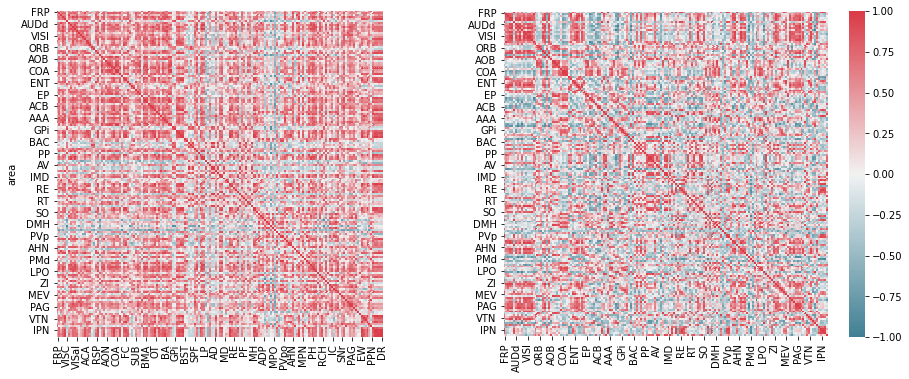

In [9]:
f, ax = plt.subplots(1,2, figsize=(16, 6))

sns.heatmap(corr_matrix_fam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, cbar=False, ax=ax[0])
sns.heatmap(corr_matrix_unfam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax[1])
ax[1].set_ylabel('')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
plt.savefig('/home/stella/Documents/Torino/projects/SexualImprinting/figures/corr_all_WILD_wF_fam_unfam.png')

# WILD WITHOUT FATHER

In [10]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'WILD_without_father'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
                if os.path.isdir(os.path.join(data_directory, name))]

In [11]:
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_WILD_without_father2500.npy', allow_pickle=True).item()
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')
# rename areas with acronyms
for df in [df_control_cell_count, df_fam_cell_count, df_unfam_cell_count]:
    for i in df.index:
        df.at[i, 'area'] = volumes[volumes['safe_name'] == \
                                   df.at[i, 'area']]['acronym'].values[0]
# remove null values
df_control_cell_count = df_control_cell_count.set_index('area').loc[
        ~(df_control_cell_count.set_index('area')==0).all(axis=1)].dropna(axis=0)
df_fam_cell_count = df_fam_cell_count.set_index('area').loc[
        ~(df_fam_cell_count.set_index('area')==0).all(axis=1)].dropna(axis=0)
df_unfam_cell_count = df_unfam_cell_count.set_index('area').loc[
        ~(df_unfam_cell_count.set_index('area')==0).all(axis=1)].dropna(axis=0)
indexes_intersect = df_unfam_cell_count.index.intersection(df_fam_cell_count.index)
df_fam_cell_count = df_fam_cell_count.loc[indexes_intersect]
df_unfam_cell_count = df_unfam_cell_count.loc[indexes_intersect]

corr_matrix_fam_ncells = df_fam_cell_count.T.corr(method='pearson')
corr_matrix_unfam_ncells = df_unfam_cell_count.T.corr(method='pearson')

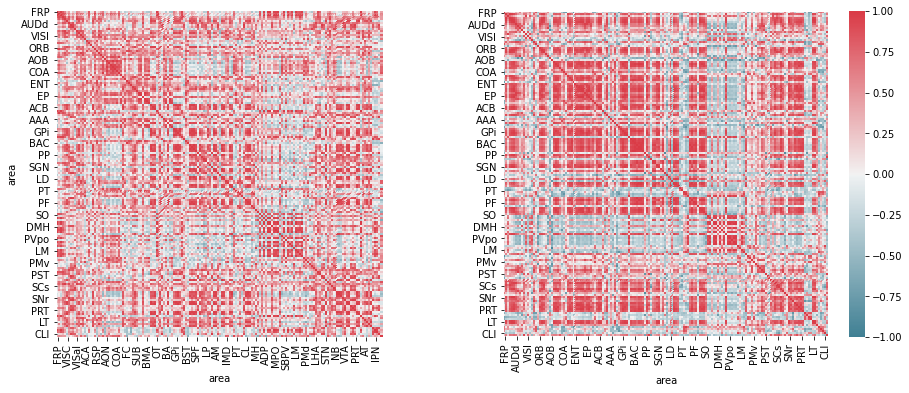

In [12]:
f, ax = plt.subplots(1,2, figsize=(16, 6))

sns.heatmap(corr_matrix_fam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, cbar=False, ax=ax[0])
sns.heatmap(corr_matrix_unfam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax[1])
ax[1].set_ylabel('')
plt.savefig('/home/stella/Documents/Torino/projects/SexualImprinting/figures/corr_all_WILD_woF_fam_unfam.png')

# PISA

In [13]:
dict_results_across_mice = np.load('dict_results/newvolumes/dict_results_across_mice_PISA.npy', 
                                   allow_pickle=True).item()
# reformat dictionary and subjects
old_keys = list(dict_results_across_mice.keys())
for key in old_keys:
    group = key.split('_')[-1] if key.split('_')[-1][-1]!='2' else key.split('_')[-1][:-1]
    number = key.split('_')[0]
    new_key = 'BL'+number+'_'+group
    dict_results_across_mice[new_key] = dict_results_across_mice[key]
    del dict_results_across_mice[key]
    
#remove BL12_noshock due to biased number of cells
del dict_results_across_mice['BL12_noshock']
subjects = list(dict_results_across_mice.keys())

In [14]:
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects,
                                                group_labels=['noshock','demonstrator', 'observer'])

In [15]:
def corr_matrix(experimental_groups,
               dict_results_across_mice,
               value='n_cells'):
    df_noshock, df_demonstrator, df_observer = \
    ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                                  dict_results_across_mice=dict_results_across_mice, 
                                  value=value)
    # rename areas with acronyms
    for df in [df_noshock, df_demonstrator, df_observer]:
        for i in df.index:
            df.at[i, 'area'] = volumes[volumes['safe_name'] == \
                                       df.at[i, 'area']]['acronym'].values[0]
    # remove null values
    df_noshock = df_noshock.set_index('area').loc[
            ~(df_noshock.set_index('area')==0).all(axis=1)].dropna(axis=0)
    df_demonstrator = df_demonstrator.set_index('area').loc[
            ~(df_demonstrator.set_index('area')==0).all(axis=1)].dropna(axis=0)
    df_observer = df_observer.set_index('area').loc[
            ~(df_observer.set_index('area')==0).all(axis=1)].dropna(axis=0)
    indexes_intersect = df_observer.index.intersection(df_demonstrator.index)
    df_demonstrator = df_demonstrator.loc[indexes_intersect]
    df_observer = df_observer.loc[indexes_intersect]
    corr_matrix_noshock = df_noshock.T.corr(method='pearson')
    corr_matrix_demonstrator = df_demonstrator.T.corr(method='pearson')
    corr_matrix_observer = df_observer.T.corr(method='pearson')
    return [corr_matrix_noshock, corr_matrix_demonstrator, corr_matrix_observer]

In [17]:
corr_noshock_ncells, corr_demonstrator_ncells, corr_observer_ncells = corr_matrix(experimental_groups,
                                                                      dict_results_across_mice,
                                                                      value='n_cells')
corr_noshock_rd, corr_demonstrator_rd, corr_observer_rd = corr_matrix(experimental_groups,
                                                                      dict_results_across_mice,
                                                                      value='relative_density')

Text(991.9129411764707, 0.5, '')

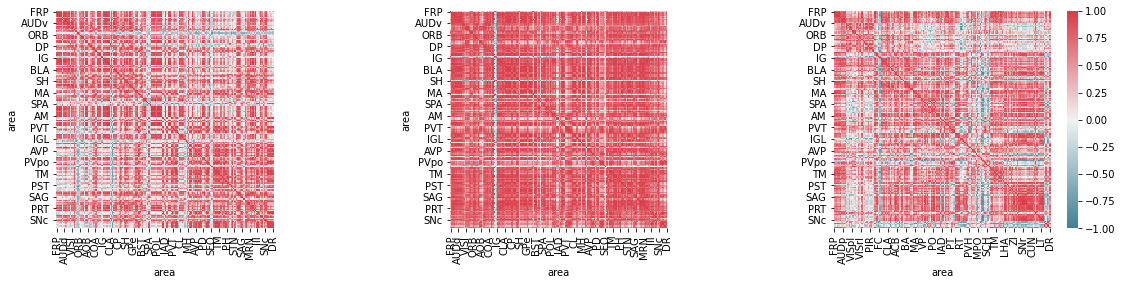

In [19]:
f, ax = plt.subplots(1,3, figsize=(20, 4))

sns.heatmap(corr_noshock_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, cbar=False, ax=ax[0])
sns.heatmap(corr_demonstrator_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, cbar=False, ax=ax[1])
sns.heatmap(corr_observer_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax[2])
ax[2].set_ylabel('')

<AxesSubplot:xlabel='area', ylabel='area'>

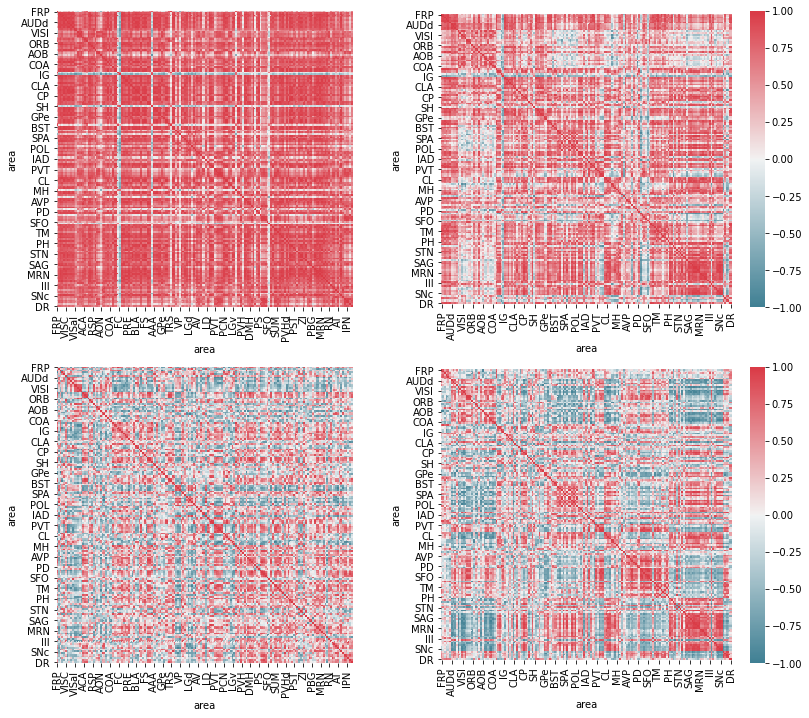

In [20]:
f, ax = plt.subplots(2,2, figsize=(14, 12))
plt.subplots_adjust(hspace=0.2, wspace=0.15)
sns.heatmap(corr_demonstrator_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, cbar=False, ax=ax[0][0])
sns.heatmap(corr_observer_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax[0][1])
sns.heatmap(corr_demonstrator_rd,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, cbar=False, ax=ax[1][0])
sns.heatmap(corr_observer_rd,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax[1][1])

# BLACK c57 with father

In [21]:
dict_results_across_mice = np.load('dict_results/newvolumes/dict_results_across_mice_c57_merged_hemispheres.npy', 
                                   allow_pickle=True).item()
subjects = list(dict_results_across_mice.keys())

In [22]:
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')
# rename areas with acronyms
for df in [df_control_cell_count, df_fam_cell_count, df_unfam_cell_count]:
    for i in df.index:
        df.at[i, 'area'] = volumes[volumes['safe_name'] == \
                                   df.at[i, 'area']]['acronym'].values[0]
# remove null values
df_control_cell_count = df_control_cell_count.set_index('area').loc[
        ~(df_control_cell_count.set_index('area')==0).all(axis=1)].dropna(axis=0)
df_fam_cell_count = df_fam_cell_count.set_index('area').loc[
        ~(df_fam_cell_count.set_index('area')==0).all(axis=1)].dropna(axis=0)
df_unfam_cell_count = df_unfam_cell_count.set_index('area').loc[
        ~(df_unfam_cell_count.set_index('area')==0).all(axis=1)].dropna(axis=0)
indexes_intersect = df_unfam_cell_count.index.intersection(df_fam_cell_count.index)
df_fam_cell_count = df_fam_cell_count.loc[indexes_intersect]
df_unfam_cell_count = df_unfam_cell_count.loc[indexes_intersect]

corr_matrix_control_ncells = df_control_cell_count.T.corr(method='pearson')
corr_matrix_fam_ncells = df_fam_cell_count.T.corr(method='pearson')
corr_matrix_unfam_ncells = df_unfam_cell_count.T.corr(method='pearson')

Text(991.9129411764707, 0.5, '')

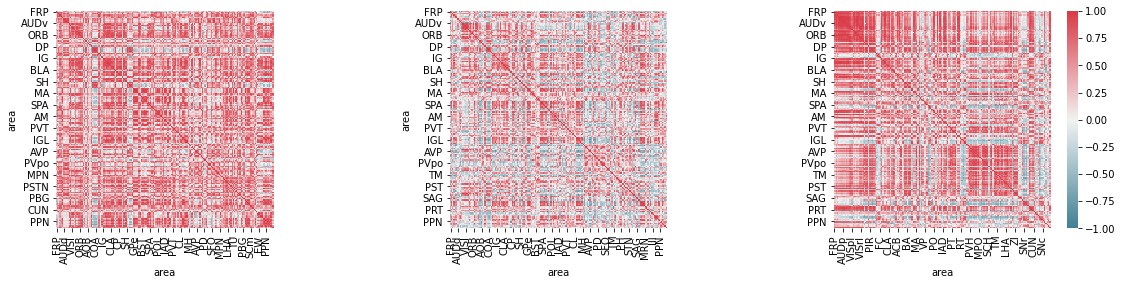

In [23]:
f, ax = plt.subplots(1,3, figsize=(20, 4))

sns.heatmap(corr_matrix_control_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, cbar=False, ax=ax[0])
sns.heatmap(corr_matrix_fam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, cbar=False, ax=ax[1])
sns.heatmap(corr_matrix_unfam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax[2])
ax[2].set_ylabel('')

In [24]:
corr_control_ncells, corr_fam_ncells, corr_unfam_ncells = corr_matrix(experimental_groups,
                                                                      dict_results_across_mice,
                                                                      value='n_cells')
corr_control_rd, corr_fam_rd, corr_unfam_rd = corr_matrix(experimental_groups,
                                                                      dict_results_across_mice,
                                                                      value='relative_density')

<AxesSubplot:xlabel='area', ylabel='area'>

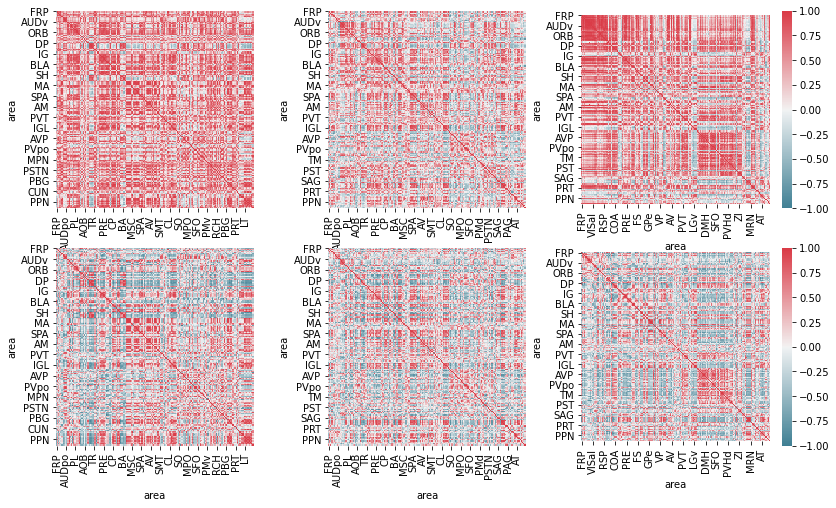

In [25]:
f, ax = plt.subplots(2,3, figsize=(14,8))
plt.subplots_adjust(hspace=0.2, wspace=0.15)
sns.heatmap(corr_control_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, cbar=False, ax=ax[0][0])
sns.heatmap(corr_fam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, cbar=False, ax=ax[0][1])
sns.heatmap(corr_unfam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax[0][2])
sns.heatmap(corr_control_rd,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, cbar=False, ax=ax[1][0])
sns.heatmap(corr_fam_rd,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, cbar=False, ax=ax[1][1])
sns.heatmap(corr_unfam_rd,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax[1][2])

# BLACK WITHOUT FATHER

In [27]:
dict_results_across_mice = np.load('dict_results/newvolumes/dict_results_across_mice_BL_woF2000.npy', 
                                   allow_pickle=True).item()
subjects = list(dict_results_across_mice.keys())
# remove unclean data
# dict_results_across_mice.pop('W8Fam')
# subjects.remove('W8Fam')

In [28]:
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')
# rename areas with acronyms
for df in [df_control_cell_count, df_fam_cell_count, df_unfam_cell_count]:
    for i in df.index:
        df.at[i, 'area'] = volumes[volumes['safe_name'] == \
                                   df.at[i, 'area']]['acronym'].values[0]
# remove null values
df_control_cell_count = df_control_cell_count.set_index('area').loc[
        ~(df_control_cell_count.set_index('area')==0).all(axis=1)].dropna(axis=0)
df_fam_cell_count = df_fam_cell_count.set_index('area').loc[
        ~(df_fam_cell_count.set_index('area')==0).all(axis=1)].dropna(axis=0)
df_unfam_cell_count = df_unfam_cell_count.set_index('area').loc[
        ~(df_unfam_cell_count.set_index('area')==0).all(axis=1)].dropna(axis=0)
indexes_intersect = df_unfam_cell_count.index.intersection(df_fam_cell_count.index)
df_fam_cell_count = df_fam_cell_count.loc[indexes_intersect]
df_unfam_cell_count = df_unfam_cell_count.loc[indexes_intersect]

corr_matrix_control_ncells = df_control_cell_count.T.corr(method='pearson')
corr_matrix_fam_ncells = df_fam_cell_count.T.corr(method='pearson')
corr_matrix_unfam_ncells = df_unfam_cell_count.T.corr(method='pearson')

Text(991.9129411764707, 0.5, '')

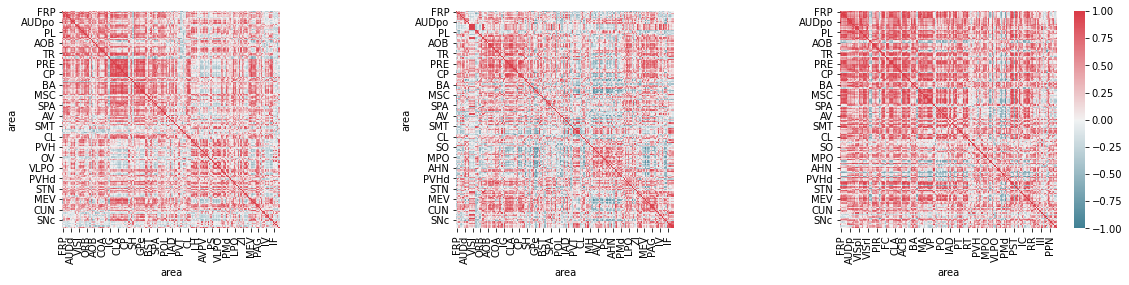

In [29]:
f, ax = plt.subplots(1,3, figsize=(20, 4))

sns.heatmap(corr_matrix_control_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, cbar=False, ax=ax[0])
sns.heatmap(corr_matrix_fam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, cbar=False, ax=ax[1])
sns.heatmap(corr_matrix_unfam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax[2])
ax[2].set_ylabel('')